In [7]:
import pandas as pd
import numpy as np

# DIABETNNI ANIQLASH 

In [16]:
df=pd.read_csv('/content/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

# Endi Korrelassiyani teshkiramiz

In [ ]:
corr_matrix=df.corr().abs()
corr_matrix.style.background_gradient(cmap='coolwarm')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,0.081672,0.073535,0.017683,0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,0.113970,0.074752
Insulin,0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,0.113970,0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [ ]:
df.corrwith(df['Outcome']).abs().sort_index(ascending=False)

SkinThickness               0.074752
Pregnancies                 0.221898
Outcome                     1.000000
Insulin                     0.130548
Glucose                     0.466581
DiabetesPedigreeFunction    0.173844
BloodPressure               0.065068
BMI                         0.292695
Age                         0.238356
dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=12)

# k-NN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=17) # k-ni qiymati

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=17)

In [ ]:
knn_gscv.best_params_

{'n_neighbors': 17}

In [ ]:
knn_gscv.best_score_

0.7669892199303965

# Eng yaxshi  k ni topish
Grid Search yordamida 

In [ ]:
from sklearn.model_selection import  GridSearchCV

param_grid={'n_neighbors':np.arange(1,25)}
knn_gscv=GridSearchCV(knn,param_grid,cv=5) 
knn_gscv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=17),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [ ]:
new_outcome=[[0,1],[0,1]]

## ML ga tayyorlash

In [ ]:
X = df.drop('Outcome', axis=1).values
y = df['Outcome']

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
y_predict=knn.predict(X_test)

# Baholash Jaccard index

In [ ]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test,y_predict)

0.5230769230769231

## Confusion matrix

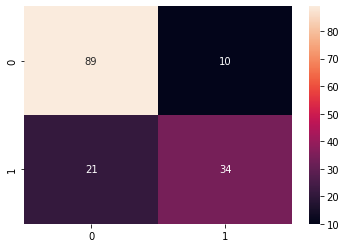

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test,y_predict),annot=True)
plt.show()

In [ ]:
confusion_matrix(y_test,y_predict)

array([[89, 10],
       [21, 34]])

In [ ]:
# from pyparsing.helpers import CaselessLiteral
from sklearn.metrics import classification_report 
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85        99
           1       0.77      0.62      0.69        55

    accuracy                           0.80       154
   macro avg       0.79      0.76      0.77       154
weighted avg       0.80      0.80      0.79       154



In [ ]:
from sklearn import metrics
print('DecisionTree Accuracy:',metrics.accuracy_score(y_test,y_predict))

DecisionTree Accuracy: 0.7987012987012987


# Xatolik reytingini aniqlash
Eng yaxshi k ni aniqlash

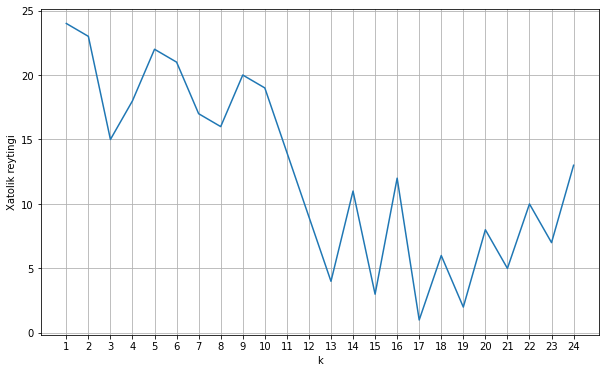

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(param_grid['n_neighbors'], knn_gscv.cv_results_['rank_test_score'])
plt.xticks(param_grid['n_neighbors'])
plt.xlabel("k")
plt.ylabel("Xatolik reytingi")
plt.grid()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
MEA=mean_absolute_error(y_test,y_predict)
mase=mean_squared_error(y_test,y_predict)
print(MEA,mase)

0.2012987012987013 0.2012987012987013


In [ ]:
pd.DataFrame(y_predict)

,0
0,0
1,1
2,0
3,0
4,0
...,...
149,1
150,0
151,1
152,0


In [ ]:
y_test

229    0
235    1
750    1
365    0
449    0
      ..
154    1
69     0
561    1
37     1
538    0
Name: Outcome, Length: 154, dtype: int64